In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functions import *

In [4]:
data = pd.read_csv("EURUSD2018.csv", header=None)

In [5]:
for index, row in data.iterrows():
    data.at[index, 2] = sum(row[2:6])/4

data = data.drop(columns=[3,4,5,6])

data.head()

,0,1,2
0,2018.01.01,17:00,1.200685
1,2018.01.01,17:01,1.200562
2,2018.01.01,17:02,1.200390
3,2018.01.01,17:03,1.200420
4,2018.01.01,17:04,1.200480


In [43]:
time_price = {'time': np.array(data[1].tolist()), 'price': np.array(data[2].tolist())}

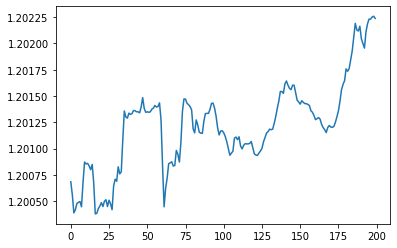

In [45]:
plt.plot(time_price['price'][:200])

In [64]:
#take every 5th record
freq = 5
tp = {'time': np.array([time_price['time'][i] for i in range(len(time_price['time'])) 
                            if int(time_price['time'][i][-2:]) % freq == 0]), 
          'price': np.array([time_price['price'][i] for i in range(len(time_price['time']))
                            if int(time_price['time'][i][-2:]) % freq == 0])}

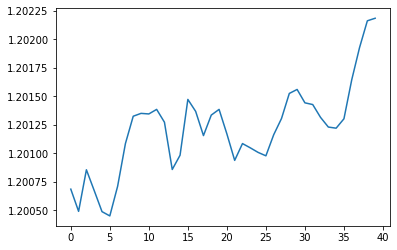

In [65]:
plt.plot(tp['price'][:40])
plt.show()

In [62]:
def price_at_time(time):
#     returns prices at exact time
    mask = time_price['time'] == time
    return np.array(time_price['price'][mask])

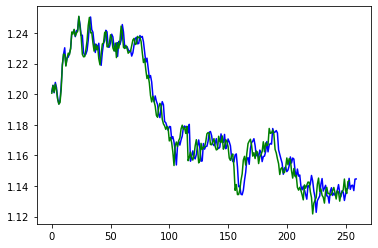

In [63]:
plt.plot(price_at_time('20:00'), 'b', 
         price_at_time('17:00'), 'g')
plt.show()

In [73]:
past = 20
future = 50
intervals = []
i = 0
while i < len(tp['price']):
    left = i - past if i - past > 0 else 0
    for j in range(left, i):
        if (abs(tp['price'][i] - tp['price'][j])) / tp['price'][j] > 0.003:
            intervals.append(tp['price'][j : i + future])
            i += forw - 1
            break
    i += 1

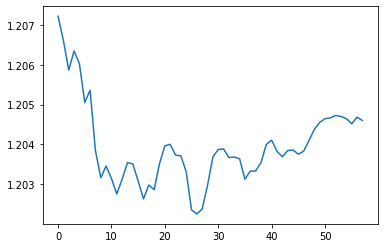

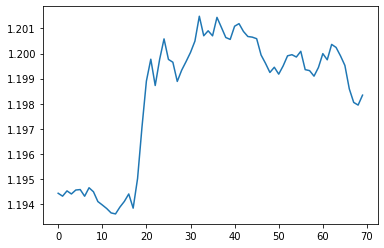

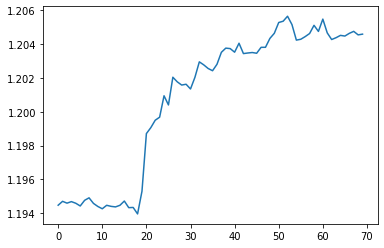

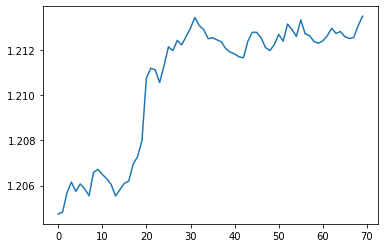

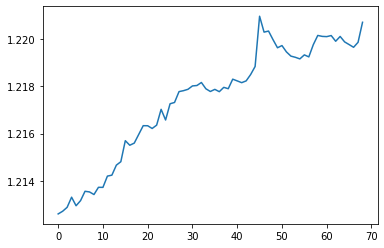

In [76]:
for i in range(5):
    plt.plot(intervals[i])
    plt.show()